In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_c1_sl_nobattery = pd.read_csv('simris/c1_solar_load_nobattery.csv', index_col=0, parse_dates=True)
df_c1_sl_nilar450 = pd.read_csv('simris/c1_solar_load_nilar450.csv', index_col=0, parse_dates=True)
df_c1_sl_nilar1040 = pd.read_csv('simris/c1_solar_load_nilar1040.csv', index_col=0, parse_dates=True)

df_c2_wl_nobattery = pd.read_csv('simris/c2_wind_load_nobattery.csv', index_col=0, parse_dates=True)
df_c2_wl_nilar450 = pd.read_csv('simris/c2_wind_load_nilar450.csv', index_col=0, parse_dates=True)
df_c2_wl_nilar1040 = pd.read_csv('simris/c2_wind_load_nilar1040.csv', index_col=0, parse_dates=True)

df_c3_swl_nobattery = pd.read_csv('simris/c3_solar_wind_load_nobattery.csv', index_col=0, parse_dates=True)
df_c3_swl_nilar450 = pd.read_csv('simris/c3_solar_wind_load_nilar450.csv', index_col=0, parse_dates=True)
df_c3_swl_nilar1040 = pd.read_csv('simris/c3_solar_wind_load_nilar1040.csv', index_col=0, parse_dates=True)

In [3]:
days = (df_c1_sl_nobattery.index[-1] - df_c1_sl_nobattery.index[0]).days
start_date = df_c1_sl_nobattery.index[0].date()
end_date = df_c1_sl_nobattery.index[-1].date()

In [4]:
print(start_date, end_date)
print(days)

2019-05-29 2020-03-13
288


In [5]:
cost_c1 = [df_c1_sl_nobattery['total_cost'].sum()*(365/days)/10**3,
           df_c1_sl_nilar450['total_cost'].sum()*(365/days)/10**3,
           df_c1_sl_nilar1040['total_cost'].sum()*(365/days)/10**3]

cost_c2 = [df_c2_wl_nobattery['total_cost'].sum()*(365/days)/10**3,
           df_c2_wl_nilar450['total_cost'].sum()*(365/days)/10**3,
           df_c2_wl_nilar1040['total_cost'].sum()*(365/days)/10**3]

cost_c3 = [df_c3_swl_nobattery['total_cost'].sum()*(365/days)/10**3,
           df_c3_swl_nilar450['total_cost'].sum()*(365/days)/10**3,
           df_c3_swl_nilar1040['total_cost'].sum()*(365/days)/10**3]

In [6]:
cost_c1

[786.8976139913124, 750.3866069619157, 726.5781281258531]

In [7]:
df = pd.DataFrame(data=[cost_c1, cost_c2, cost_c3], index=['Solar+Load', 'Wind+Load', 'Solar+Wind+Load'], columns=['No battery', 'Nilar 450 kWh', 'Nilar 1040 kWh'])

df.to_excel('simris_nilar_opt_kSEK_yearly.xlsx')

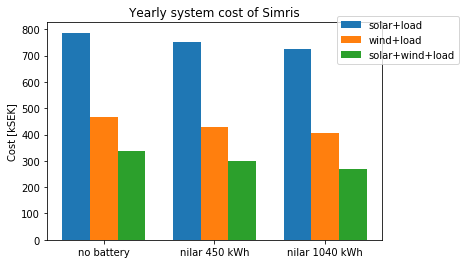

In [8]:
labels = ['no battery', 'nilar 450 kWh', 'nilar 1040 kWh']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width, cost_c1, width, label='solar+load')
rects2 = ax.bar(x, cost_c2, width, label='wind+load')
rects3 = ax.bar(x + width, cost_c3, width, label='solar+wind+load')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost [kSEK]')
ax.set_title('Yearly system cost of Simris')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.85, 1.05))

In [11]:
plt.bar(['Base case', 'Nilar 450 kWh', 'Nilar 1040 kWh'], cost)
plt.title('Period: '+str(start_date)+' to '+str(end_date))
plt.ylabel('Costs [kSEK]')

NameError: name 'cost' is not defined

In [46]:
df_nilar1040['power_trade'] = df_nilar1040['power_buy']-df_nilar1040['power_sell']
df_nilar1040['battery_use'] = df_nilar1040['battery_discharge']-df_nilar1040['battery_charge']


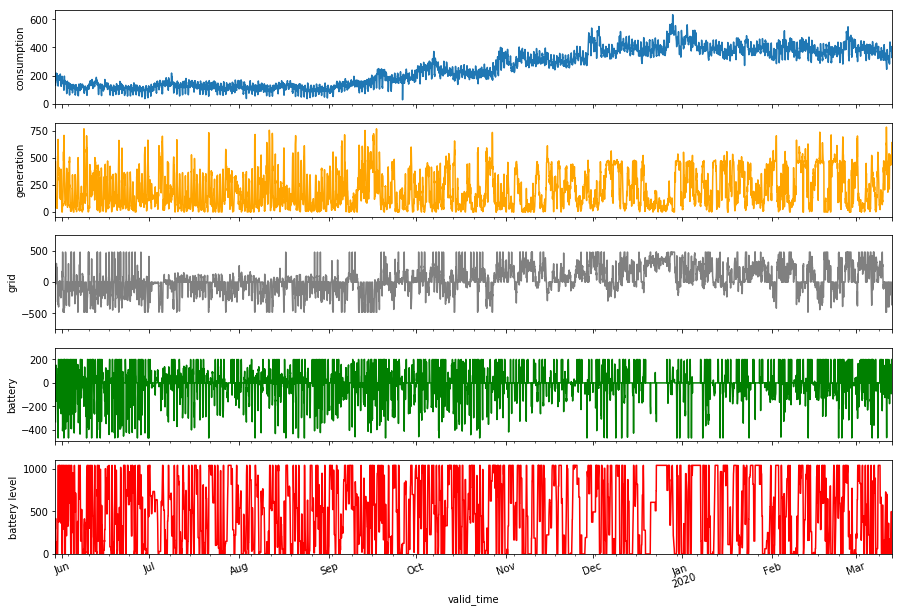

In [50]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,10))
df_nilar1040['consumption'].plot(ax=ax[0])
ax[0].set_ylabel('consumption')
df_nilar1040['generation'].plot(ax=ax[1], color='orange')
ax[1].set_ylabel('generation')
df_nilar1040['power_trade'].plot(ax=ax[2], color='gray')
ax[2].set_ylabel('grid')
ax[2].set_ylim([-750, 750])
df_nilar1040['battery_use'].plot(ax=ax[3], color='green')
ax[3].set_ylabel('battery')
ax[3].set_ylim([-500, 300])
df_nilar1040['battery_state'].plot(ax=ax[4], color='red')
ax[4].set_ylabel('battery level')
ax[4].set_ylim([0, 1100])
_ = plt.xticks(rotation=20)